In [2]:
from classes import * # Wrappers package for the project - PRNUProcessor, DatasetProcessor, ImageProcessor, ModelBuilder, PickleHandler

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

#test change

2023-08-15 23:12:57.429731: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-15 23:12:57.672502: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-15 23:12:57.673908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 23:12:58.547925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Simple test 
Loading a small subset of pictures from the Korus dataset to do noise testing </br>
Pictures have been resized to 300px for these tests </br>
To avoid decoding pictures everytime the notebook is run these are loaded as binaries using pickle (folder data-pickle)

In [4]:
def pickleTest(dataDir = './data-images'):
    myProcessor = DatasetProcessor(dataDir)
    pics, picDirs, camera_model, tampered = myProcessor.dirCollection()

    PickleHandler.save(pics, 'pics')
    PickleHandler.save(picDirs, 'picDirs')
    PickleHandler.save(camera_model, 'camera_model')
    PickleHandler.save(tampered, 'tampered')
    return None

def pickleLoadTest():
    pics =         PickleHandler.load('pics')
    picDirs =      PickleHandler.load('picDirs')
    camera_model = PickleHandler.load('camera_model')
    tampered =     PickleHandler.load('tampered')
    return pics, picDirs, camera_model, tampered

def resizePics(pics, dataDir = './data-images'):
    myProcessor = DatasetProcessor(dataDir)
    return DatasetProcessor.resizePics(myProcessor, pics, 100)
    # df = pd.DataFrame({'dir' : picDirs, 'camera' : camera_model, 'type' : tampered})
    # print(df.to_string(index=False))

In [5]:
pics, picDirs, camera_model, tampered = pickleLoadTest()

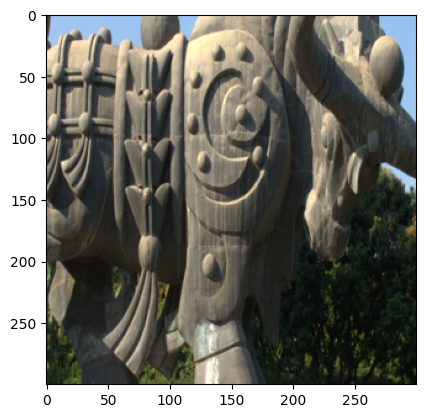

In [6]:
plt.imshow(pics[15])
#plt.savefig('test_output/output.png')

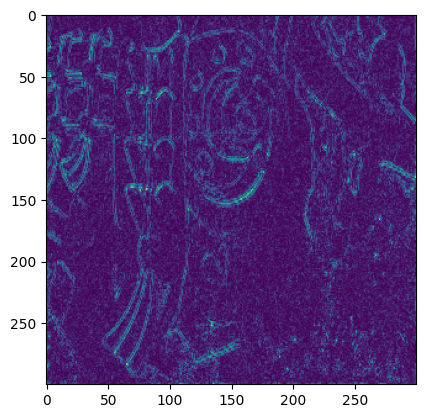

In [7]:
testPic = PRNUProcessor.extract_single(pics[15])
plt.imshow(testPic)
#plt.savefig('test_output/noiseTest01.png')

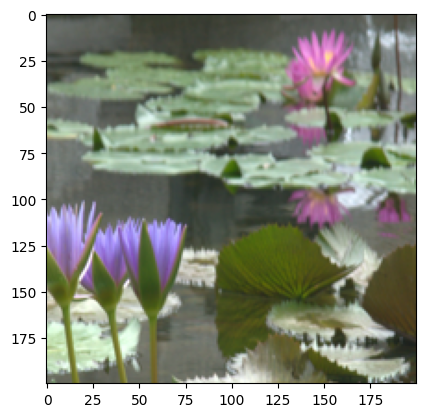

In [8]:
# crop test
testPic = PRNUProcessor.crop(pics[14], (200, 200, 3))
plt.imshow(testPic)
#plt.savefig('test_output/noiseTest01.png')

In [11]:
#testMultiple = PRNUProcessor.extract_multiple_aligned([PRNUProcessor.rgb2gray(pic) for pic in pics[:5]])
testMultiple = PRNUProcessor.extract_multiple_aligned(pics[:5])
plt.imshow(testMultiple[2])

ValueError: operands could not be broadcast together with shapes (300,300,3) (300,300) 